# Aula dia 07/01/2025 

### Breast Cancer

In [52]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [53]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC

In [54]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
breast_cancer = load_breast_cancer(as_frame = True)
df_breast = breast_cancer.frame

In [57]:
X_breast_cancer = df_breast.drop('target',axis = 1)
Y_breast_cancer = df_breast['target']

In [58]:
X_train_breast_cancer,X_test_breast_cancer,Y_train_breast_cancer,Y_test_breast_cancer = train_test_split(X_breast_cancer,Y_breast_cancer,test_size = 0.20, random_state = 0)

In [59]:
X_train_breast_cancer.shape, X_test_breast_cancer.shape, Y_train_breast_cancer.shape, Y_test_breast_cancer.shape

((455, 30), (114, 30), (455,), (114,))

# Modelos NB

In [60]:
modelos_nb = {
    "GaussianNB": GaussianNB(),
    "BernoulliNB":BernoulliNB(),
    "MultinomialNB": MultinomialNB()
}

# Modelos svm

In [61]:
modelos_svm = {
    "SVM (Linear)": SVC(kernel='linear',C=1.0,random_state=0),
    "SVM (RGF)": SVC(kernel='rbf', C=1.0, random_state=0),
    "SVM (Poly)": SVC(kernel='poly', C=1.0, random_state=0)
}

# Resultados

In [62]:
resultados = {
    'Modelo': [],
    'Acuracia': []
}

### NB

In [63]:
for nome_modelo, modelo in  modelos_nb.items():
    modelo.fit(X_train_breast_cancer, Y_train_breast_cancer)
    y_preds_breast_cancer = modelo.predict(X_test_breast_cancer)
    acc = accuracy_score(Y_test_breast_cancer, y_preds_breast_cancer)
    resultados['Modelo'].append(nome_modelo)
    resultados['Acuracia'].append(acc)


    print(f'\n==== {nome_modelo} =====')
    print(f'Acurácia: {acc:.4f}')
    print('Relatório de classificação')
    print(classification_report(Y_test_breast_cancer, y_preds_breast_cancer, zero_division=0))
    print('Matriz de confusão')
    print(confusion_matrix(Y_test_breast_cancer,y_preds_breast_cancer))
    print('-' * 80)


==== GaussianNB =====
Acurácia: 0.9298
Relatório de classificação
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        47
           1       0.94      0.94      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

Matriz de confusão
[[43  4]
 [ 4 63]]
--------------------------------------------------------------------------------

==== BernoulliNB =====
Acurácia: 0.5877
Relatório de classificação
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.59      1.00      0.74        67

    accuracy                           0.59       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.35      0.59      0.44       114

Matriz de confusão
[[ 0 47]
 [ 0 67]]
------------------------------------------------------

### SVM

In [64]:
for nome_modelo, modelo in  modelos_svm.items():
    modelo.fit(X_train_breast_cancer, Y_train_breast_cancer)
    y_preds_breast_cancer = modelo.predict(X_test_breast_cancer)
    acc = accuracy_score(Y_test_breast_cancer, y_preds_breast_cancer)
    resultados['Modelo'].append(nome_modelo)
    resultados['Acuracia'].append(acc)


    print(f'\n==== {nome_modelo} =====')
    print(f'Acurácia: {acc:.4f}')
    print('Relatório de classificação')
    print(classification_report(Y_test_breast_cancer, y_preds_breast_cancer, zero_division=0))
    print('Matriz de confusão')
    print(confusion_matrix(Y_test_breast_cancer,y_preds_breast_cancer))
    print('-' * 80)


==== SVM (Linear) =====
Acurácia: 0.9561
Relatório de classificação
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.98      0.94      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Matriz de confusão
[[46  1]
 [ 4 63]]
--------------------------------------------------------------------------------

==== SVM (RGF) =====
Acurácia: 0.9298
Relatório de classificação
              precision    recall  f1-score   support

           0       0.98      0.85      0.91        47
           1       0.90      0.99      0.94        67

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114

Matriz de confusão
[[40  7]
 [ 1 66]]
------------------------------------------------------

# Resultados 

In [65]:
df_resultados =  pd.DataFrame(resultados)

In [66]:
print('\n ============ Resumo dos resultados =========')
print(df_resultados)


 ============ Resumo dos resultados =========
          Modelo  Acuracia
0     GaussianNB  0.929825
1    BernoulliNB  0.587719
2  MultinomialNB  0.894737
3   SVM (Linear)  0.956140
4      SVM (RGF)  0.929825
5     SVM (Poly)  0.912281


### Somente acima de 90% de acurácia

In [67]:
df_resultados_ = df_resultados[df_resultados['Acuracia'] >= 0.90].copy()

In [68]:
df_resultados_.reset_index(drop = True, inplace = True)

In [69]:
df_resultados_

,Modelo,Acuracia
0,GaussianNB,0.929825
1,SVM (Linear),0.956140
2,SVM (RGF),0.929825
3,SVM (Poly),0.912281


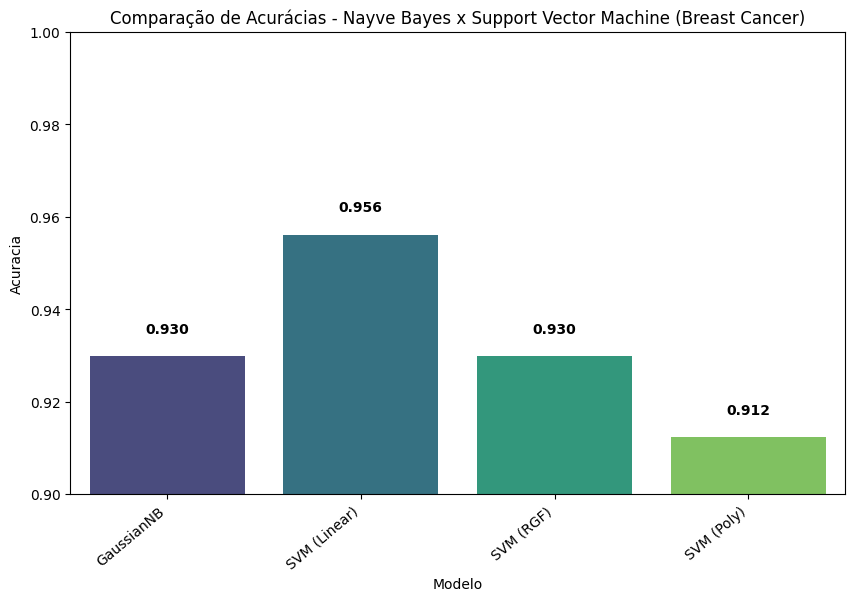

In [70]:
plt.figure(figsize=(10,6))
sns.barplot(
    data = df_resultados_,
    x = 'Modelo',
    y = 'Acuracia',
    hue = 'Modelo',
    palette = 'viridis',
    legend = False
)

plt.title('Comparação de Acurácias - Nayve Bayes x Support Vector Machine (Breast Cancer)')
for i, v in enumerate(df_resultados_['Acuracia']):
    plt.text(i,v + 0.005, f'{v:.3f}', ha = 'center', fontweight = 'bold')
plt.xticks(rotation = 40, ha = 'right')
plt.ylim(0.90,1.0)
##plt.subplots.adjust(bottom = 0.25)
plt.show()

# Regressão 

In [71]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
california = fetch_california_housing(as_frame = True)
df_cal = california.frame

In [73]:
X_cal = df_cal.drop('MedHouseVal',axis =1 )
Y_cal = df_cal['MedHouseVal']

In [74]:
X_train_cal,X_test_cal, Y_train_cal,Y_test_cal = train_test_split(
    X_cal,Y_cal,
    test_size = 0.20,
    random_state = 0
)

In [75]:
X_cal.shape, Y_cal.shape

((20640, 8), (20640,))

# Regressão linear

In [76]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_cal,Y_train_cal)

LinearRegression()